## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [5]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2,16,32,128,256]
MOMENTUM = 0.95

W1208 16:01:42.227875  6300 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1208 16:01:42.242835  6300 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1208 16:01:42.245827  6300 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1208 16:01:42.337089  6300 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 141s 3ms/step - loss: 2.2454 - acc: 0.1589 - val_loss: 2.6446 - val_acc: 0.2019
Epoch 50/50
50000/50000 [==============================] - 140s 3ms/step - loss: 2.2494 - acc: 0.1581 - val_loss: 3.0436 - val_acc: 0.1846
batch_size=2


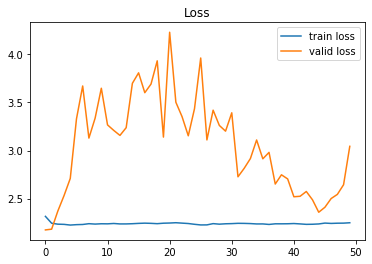

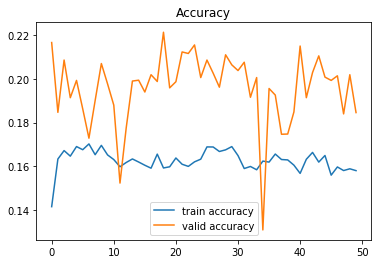

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 362us/step - loss: 2.0606 - acc: 0.2464 - val_loss: 2.0417 - val_acc: 0.2775
Epoch 2/50
50000/50000 [==============================] - 18s 361us/step - loss: 2.0162 - acc: 0.2681 - val_loss: 1.9982 - val_acc: 0.2937
Epoch 3/50
50000/50000 [==============================] - 18s 359us/step - loss: 1.9960 - acc: 0.2730 - val_loss: 1.9913 - val_acc: 0.3026
Epoch 4/50
50000/50000 [==============================] - 18s 357us/step - loss: 1.9816 - acc: 0.2787 - val_loss: 1.9733 - val_acc: 0.3135
Epoch 5/50
50000/50000 [==============================] - 18s 357us/step - loss: 1.9613 - acc: 0.2919 - val_loss: 1.9753 - val_acc: 0.3216
Epoch 6/50
50000/50000 [==============================] - 18s 368us/step - loss: 1.9469 - acc: 0.2960 - val_loss: 1.9233 - val_acc: 0.3294
Epoch 7/50
50000/50000 [==============================] - 18s 366us/step - loss: 1.9332 - acc: 0.3016 - val_loss: 1.

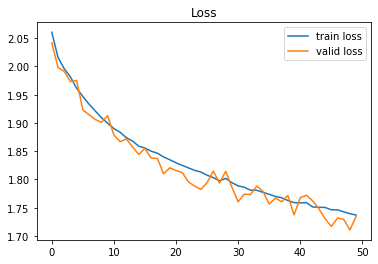

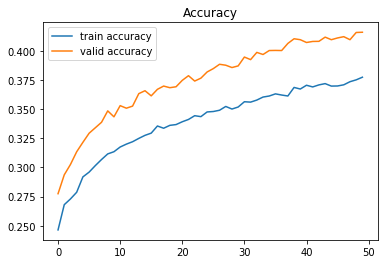

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.6701 - acc: 0.4019 - val_loss: 1.6898 - val_acc: 0.4286
Epoch 2/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.6650 - acc: 0.4033 - val_loss: 1.7047 - val_acc: 0.4221
Epoch 3/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.6641 - acc: 0.4025 - val_loss: 1.6774 - val_acc: 0.4275
Epoch 4/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.6574 - acc: 0.4055 - val_loss: 1.6696 - val_acc: 0.4260
Epoch 5/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.6613 - acc: 0.4032 - val_loss: 1.6964 - val_acc: 0.4263
Epoch 6/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.6577 - acc: 0.4069 - val_loss: 1.6790 - val_acc: 0.4322
Epoch 7/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.6575 - acc: 0.4060 - val_loss: 1.6838 - 

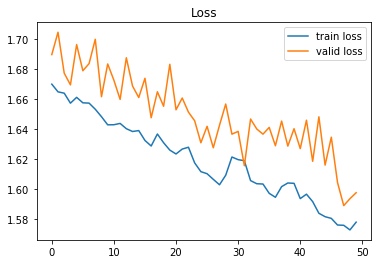

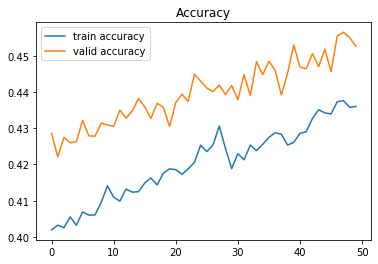

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.5053 - acc: 0.4622 - val_loss: 1.5636 - val_acc: 0.4605
Epoch 2/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.4991 - acc: 0.4662 - val_loss: 1.5517 - val_acc: 0.4630
Epoch 3/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.4997 - acc: 0.4642 - val_loss: 1.5615 - val_acc: 0.4590
Epoch 4/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.4978 - acc: 0.4663 - val_loss: 1.5592 - val_acc: 0.4613
Epoch 5/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.4950 - acc: 0.4657 - val_loss: 1.5509 - val_acc: 0.4634
Epoch 6/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.4930 - acc: 0.4659 - val_loss: 1.5477 - val_acc: 0.4640
Epoch 7/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.4936 - acc: 0.4685 - val_loss: 1.5485 - val_acc

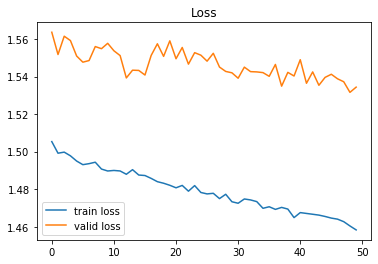

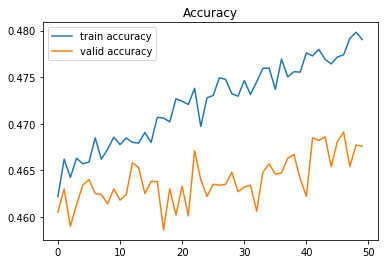

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4463 - acc: 0.4841 - val_loss: 1.5226 - val_acc: 0.4659
Epoch 2/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4458 - acc: 0.4845 - val_loss: 1.5243 - val_acc: 0.4692
Epoch 3/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4443 - acc: 0.4842 - val_loss: 1.5212 - val_acc: 0.4669
Epoch 4/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4430 - acc: 0.4840 - val_loss: 1.5212 - val_acc: 0.4672
Epoch 5/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4438 - acc: 0.4863 - val_loss: 1.5215 - val_acc: 0.4679
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4438 - acc: 0.4837 - val_loss: 1.5280 - val_acc: 0.4647
Epoch 7/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4432 - acc: 0.4848 - val_loss: 1.5207 - val_acc

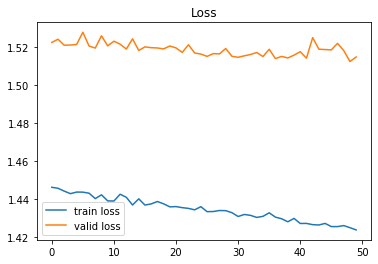

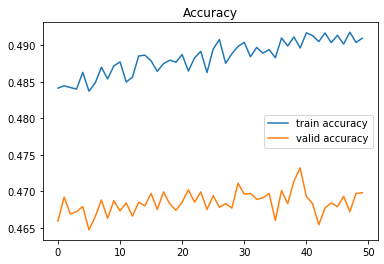

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

for BATCH_SIZE_value in BATCH_SIZE:    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE_value, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    import matplotlib.pyplot as plt
    %matplotlib inline
    
    print(f'batch_size={BATCH_SIZE_value}')

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()

2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               3289

Epoch 50/50
50000/50000 [==============================] - 2s 32us/step - loss: 0.4725 - acc: 0.8745 - val_loss: 1.5619 - val_acc: 0.5108
batch_size=1024


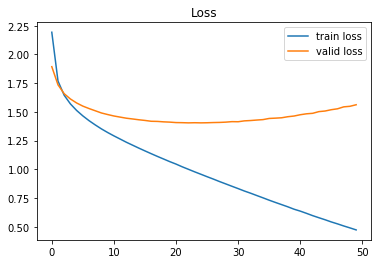

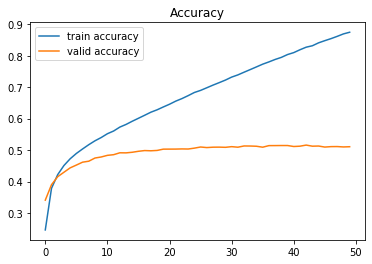

In [17]:
def build_mlp_1(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)            
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)            
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

model = build_mlp_1(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

import matplotlib.pyplot as plt
%matplotlib inline

print(f'batch_size={BATCH_SIZE}')

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

3. 請於 BN 放在 Input Layer 後，並比較結果

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
_____________________________________________

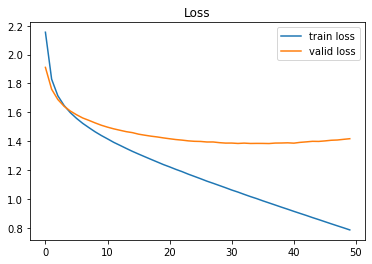

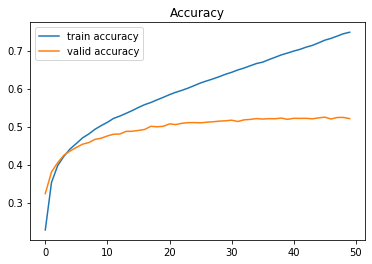

In [18]:
def build_mlp_2(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)            
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)            
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

model = build_mlp_2(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

import matplotlib.pyplot as plt
%matplotlib inline

print(f'batch_size={BATCH_SIZE}')

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()